In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import keras
from keras import backend as K
from keras import metrics
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)
!nvidia-smi -L

cuda
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from torchvision import datasets, transforms
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

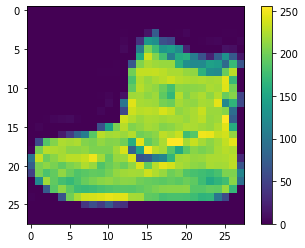

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

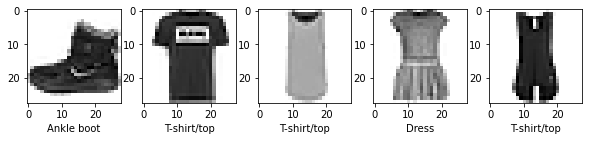

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [ ]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels), epochs=7)

Epoch 1/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1404 - accuracy: 0.9472 - f1_m: 1.1723 - precision_m: 0.9161 - recall_m: 1.6396 - val_loss: 0.3832 - val_accuracy: 0.8876 - val_f1_m: 1.1701 - val_precision_m: 0.9163 - val_recall_m: 1.6329
Epoch 2/7
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1372 - accuracy: 0.9478 - f1_m: 1.1713 - precision_m: 0.9157 - recall_m: 1.6377 - val_loss: 0.3877 - val_accuracy: 0.8895 - val_f1_m: 1.1794 - val_precision_m: 0.9209 - val_recall_m: 1.6516
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1345 - accuracy: 0.9499 - f1_m: 1.1682 - precision_m: 0.9171 - recall_m: 1.6209 - val_loss: 0.4044 - val_accuracy: 0.8838 - val_f1_m: 1.1884 - val_precision_m: 0.9195 - val_recall_m: 1.6947
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1312 - accuracy: 0.9495 - f1_m: 1.1680 - precision_m: 0.9191 - recall_m: 1.6137 - val_loss: 0.4045 - val_accuracy: 0.8886 

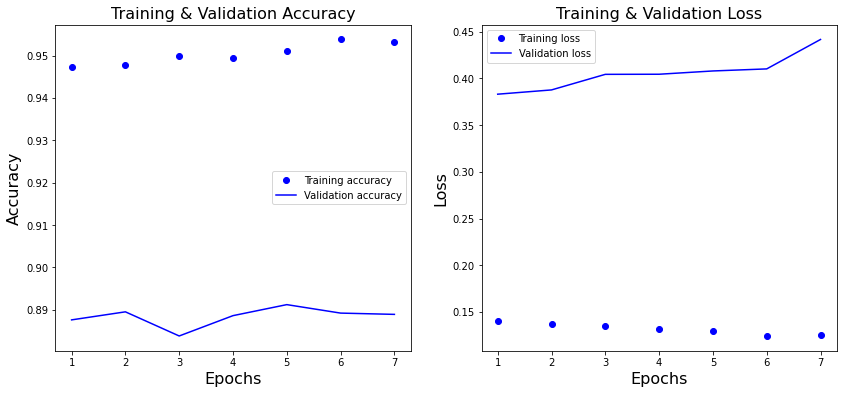

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the model accuracy vs Epochs

ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

# Plot the loss vs Epochs

ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#The difference between training accuracy and validation(testing) accuracy is due to the model over-fitting on the training data
#The model started overfitting after the 10th epoch so early stopping could prevent it from overfitting 

In [ ]:
test_loss, test_acc, *is_anything_else_being_returned = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.4418 - accuracy: 0.8889 - f1_m: 1.1583 - precision_m: 0.9108 - recall_m: 1.6036
Test accuracy: 0.8888999819755554
Test loss: 0.44175538420677185


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([-24.778694 , -30.211304 , -30.488497 , -42.02908  , -35.97228  ,
       -15.304914 , -24.248812 ,  -2.5439212, -25.9451   ,   5.1701827],
      dtype=float32)

In [ ]:
predictions[0].argmax()

9

In [ ]:
test_labels[0]

9

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.


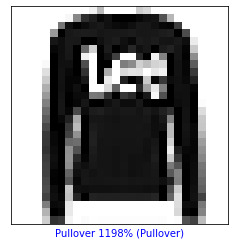

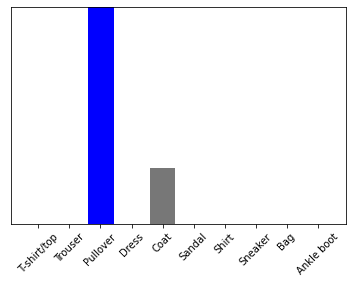

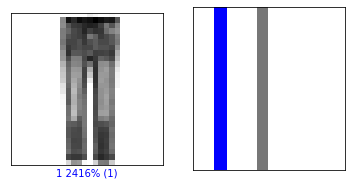

In [ ]:
# Installing helper utilities needed
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

# Show the 1st image:
index = 1
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index, big=True, class_names=class_names)

# Show the 15th image:
index = 15
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index)

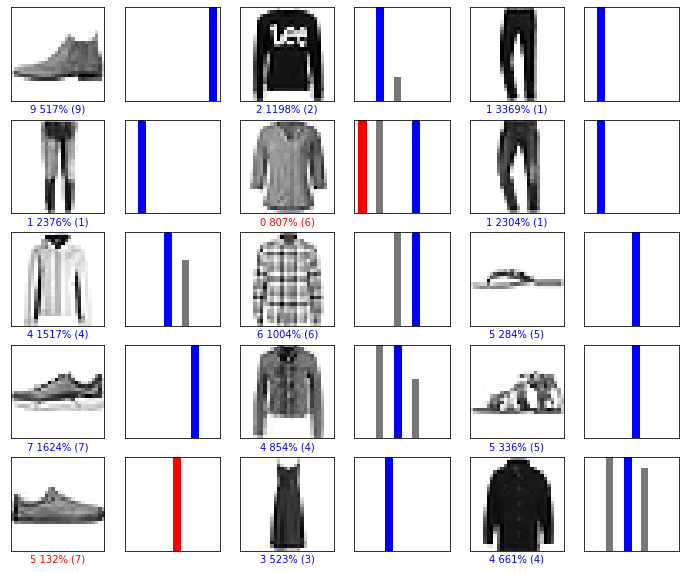

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
utils.plot_multi_images_prob(predictions, test_labels, test_images)

Confusion matrix


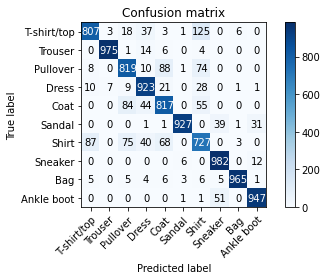

In [ ]:
# Plotting the confusion matrix 
predicted_classes = utils.label_with_highest_prob(predictions)
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=test_labels, classes=np.array(class_names))